In [37]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.append('..')
from helpers.glove_neighbors import *
from helpers.funcs import *

In [38]:
config = json.load(open('../config.json', 'r'))
DATA_DIR = config['DATA_DIR']
TWEET_DIR = config['TWEET_DIR']
NUM_CLUSTERS = config['NUM_CLUSTERS']

In [39]:
event_times = json.load(open(DATA_DIR + "event_times.json","r"))

In [64]:
event = 'orlando'

In [65]:
cluster_method = ''

In [66]:
hour = 60 * 60
day = 24 * hour
split_by = 12 * hour
no_splits = int((day / split_by) * 14)  # 14 days

In [71]:
data = pd.read_csv('/Users/ddemszky/Google_Drive/Research/Framing/all_events/' + event + '/' + event + '.csv', sep='\t', lineterminator='\n',
                       usecols=['user_id', 'text', 'dem_follows', 'rep_follows', 'timestamp'])

In [72]:
len(data)

1560616

(array([1.14900e+03, 8.23000e+02, 5.50000e+02, 4.48000e+02, 1.04000e+02,
        4.23000e+02, 3.77500e+03, 1.31000e+04, 1.26030e+04, 2.49140e+04,
        3.72430e+04, 1.04141e+05, 1.29747e+05, 1.13132e+05, 9.20270e+04,
        6.64560e+04, 5.79060e+04, 4.88420e+04, 4.17000e+04, 3.49310e+04,
        3.03160e+04, 2.36330e+04, 1.96400e+04, 1.71400e+04, 1.61810e+04,
        2.16770e+04, 3.13210e+04, 3.54450e+04, 3.94260e+04, 4.29920e+04,
        3.98350e+04, 3.73010e+04, 3.46820e+04, 3.25300e+04, 3.17990e+04,
        2.85090e+04, 2.65630e+04, 2.16310e+04, 1.72240e+04, 1.28370e+04,
        1.03960e+04, 1.12930e+04, 1.57770e+04, 2.01290e+04, 2.48520e+04,
        3.21910e+04, 2.97530e+04, 2.51610e+04, 2.33400e+04, 2.30280e+04]),
 array([-3.61655093e-01, -3.01710648e-01, -2.41766204e-01, -1.81821759e-01,
        -1.21877315e-01, -6.19328704e-02, -1.98842593e-03,  5.79560185e-02,
         1.17900463e-01,  1.77844907e-01,  2.37789352e-01,  2.97733796e-01,
         3.57678241e-01,  4.17622685e-01

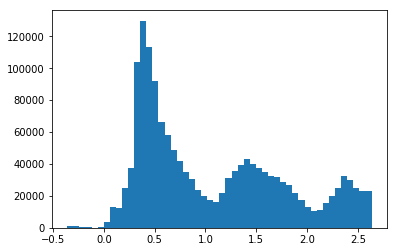

In [73]:
plt.hist((data['timestamp']-event_times[event]) / day, bins=50)

In [29]:
data = filter_clustered_tweets(event, data, TWEET_DIR, cluster_method)

In [30]:
len(data)

534774

In [31]:
data['topic'] = get_clusters(event, TWEET_DIR, cluster_method, NUM_CLUSTERS)

In [32]:
len(data)

534774

In [33]:
(data['timestamp'] > event_times['orlando']).sum()

534773

(array([  573.,  3146.,  3496.,  5775.,  9797., 14934., 36469., 36006.,
        32777., 28151., 21294., 17535., 16262., 14014., 11728., 10629.,
         9444.,  6729.,  5468.,  4218.,  3948.,  4791.,  7661.,  9976.,
        11332., 12172., 14545., 12956., 12980., 11469., 10933., 10527.,
        10292.,  9393.,  8376.,  7008.,  5171.,  3905.,  2844.,  2717.,
         3245.,  4606.,  6517.,  7944., 10332.,  9974.,  9173.,  7492.,
         7140.,  6910.]),
 array([0.        , 0.05271134, 0.10542269, 0.15813403, 0.21084537,
        0.26355671, 0.31626806, 0.3689794 , 0.42169074, 0.47440208,
        0.52711343, 0.57982477, 0.63253611, 0.68524745, 0.7379588 ,
        0.79067014, 0.84338148, 0.89609282, 0.94880417, 1.00151551,
        1.05422685, 1.10693819, 1.15964954, 1.21236088, 1.26507222,
        1.31778356, 1.37049491, 1.42320625, 1.47591759, 1.52862894,
        1.58134028, 1.63405162, 1.68676296, 1.73947431, 1.79218565,
        1.84489699, 1.89760833, 1.95031968, 2.00303102, 2.05574236

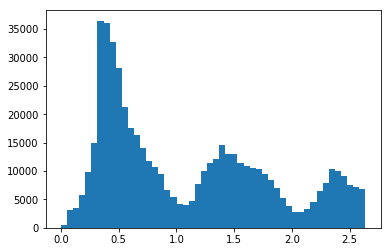

In [36]:
plt.hist((data['timestamp']-event_times[event]) / day, bins=50)

In [16]:
buckets = get_buckets(data, event_times[event], no_splits, split_by)

In [17]:
for b in buckets:
    print(len(b))

158003
126106
87795
83786
60674
18398
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
